#### Surface Water Runoff

This is a simple 1D ramp on which we rain and apply a series of boundary conditions.  Note these also show the use of observations, which allow for visualization that is spatially sparse but is evaluated frequently in time.  The most common use of this is hydrographs (which is what we use this for here).

Author: Ethan Coon

In [37]:
%matplotlib inline
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import parse_xmf
import column_data
import colors
import numpy as np
from matplotlib import pyplot as plt

In [78]:
# plot the solution
def plot(directory):
    dat = column_data.column_data(["surface-ponded_depth", "surface-elevation"],
                                  filename="visdump_surface_data.h5", directory=directory, coord=0)
    cm = colors.cm_mapper(0,dat.shape[1]-1)
    times = np.array(parse_xmf.get_times(directory=directory, base="visdump_surface_data.h5"))*365.*24*60
    
    x = dat[0,0,:]
    fig, ax = plt.subplots(1,2, figsize=(14,3))

    # This simply gets a colorbar axis
    C = [[0,0],[0,0]]
    C3 = ax[0].contourf(C, times, cmap='jet')
    ax[0].cla()  
    
    ax[0].plot(x, dat[2,0,:], 'k')
    for i in range(dat.shape[1]):
        ax[0].plot(x, dat[2,0,:]+dat[1,i,:], color=cm(i))

    ax[0].set_xlabel('x-coordinate [m]')
    ax[0].set_ylabel('z-coordinate [m]')
    
    hydro = np.loadtxt(os.path.join(directory, 'surface_outlet_flux.dat'))
    ax[1].plot(hydro[:,0]/60.0, hydro[:,1], 'b')
    ax[1].set_xlabel('time [min]')
    ax[1].set_ylabel('flow rate [mol/s]')
    
    cbar = plt.colorbar(C3, ax=ax[0])
    cbar.ax.set_ylabel("time [min]")
    
    plt.tight_layout()
    plt.show()
    

The baseline problem -- this simply rains with no flux boundaries uphill and a max ponded depth (seepage face) downstream, where the river stage is set to ~20cm.  The rain turns off after 30 minutes, and the simulation continues to drain for 3 hours.

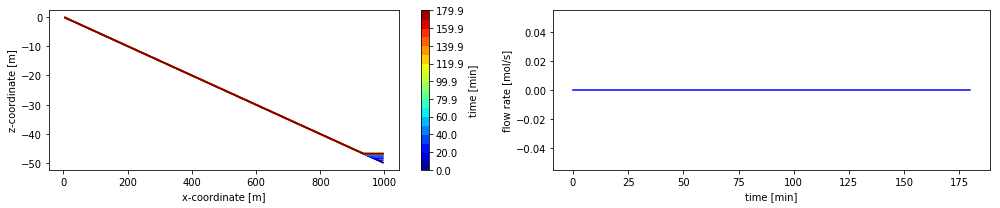

In [83]:
plot("surface_water.demo")

Often it is useful to set a max river stage, or head boundary condition, which lets water out once the head gets above a certain level (e.g. 10 cm here).

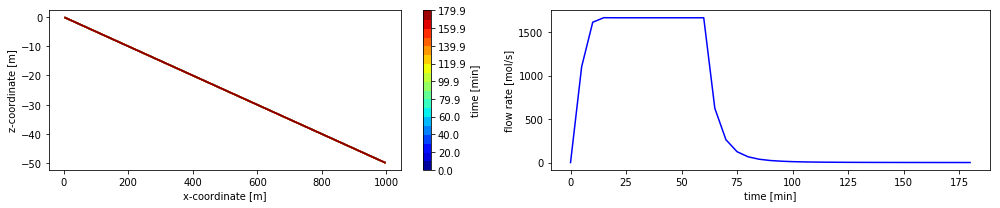

In [84]:
plot("surface_water-max_head.demo")

There are two other alternatives to setting the max ponded depth at the outlet.  The first is a "zero ponded depth gradient" boundary, where the water level is assumed to parallel the topography.  Note this is really only useful in synthetic cases, where you know that this will not result in water flowing **_into_** the domain.

NOTE: ETC: FIX ME, these look pretty broken!

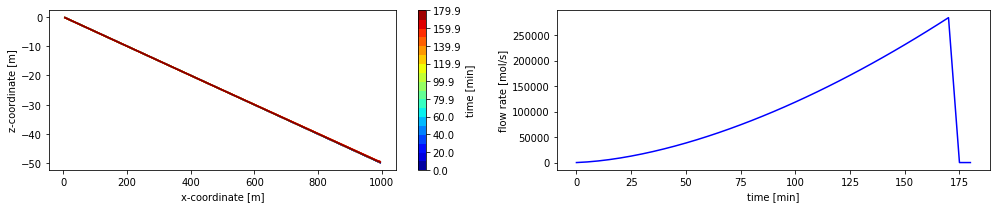

In [87]:
plot("surface_water-zero_gradient.demo")

Finally, the second is a critical depth boundary condition, which sets the flux based on ponded depth, and is standard in the literature.

$q = n_{liq} h \sqrt{gh}$

or equivalently,

$V = \sqrt{gh}$.

Note that as this goes to zero with zero ponded depth, it takes a long time to drain.

NOTE: ETC: FIX ME, these look pretty broken!

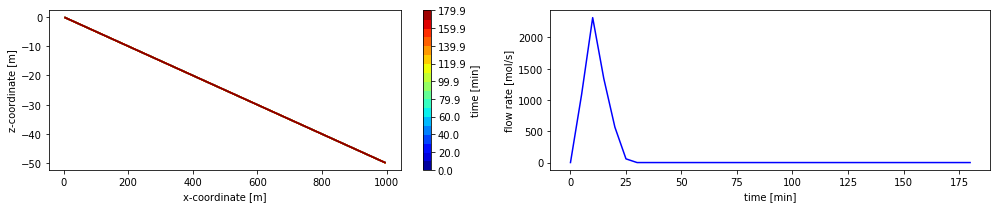

In [88]:
plot("surface_water-critical_depth.demo")